파이썬 머신러닝 완벽가이드 ch5. 1~ 5 pg. 308~ 337

### **[개념정리]**📝
# **CHAPTER 5**

### **01. 회귀 소개**

회귀분석: 데이터 값은 평균과 같은 일정한 값으로 돌아가려는 경향을 가진다. 여러 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법
- 독립변수: 피처 / 종속변수: 결정 값
- 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것이 핵심
- 독립변수 개수: 1개(단일회귀), 여러개(다중회귀) / 회귀계수의 결합: 선형(선형회귀), 비선형(비선형회귀)
- **지도학습**: 분류(예측값이 이산형 값), 회귀(예측값이 연속형 숫자값)
- 선형회귀: 가장 많이 사용, 실제 값과 예측값의 차이(오류제곱값)을 최소화하난 직선형 회귀선을 최적화하는 방식

    - 일반 선형 회귀: 규제X
    - 릿지(Ridge): L2규제 추가, 예측 영향도가 큰 계수의 회귀계수값을 작게 함
    - 라쏘(Lasso): L1규제 적용, 예측영향도가 작은 피처의 회귀계수 0으로 함. 피처 개수 조절
    - 엘라스틱넷(ElasticNet): L2, L1 함께 결합
    - 로지스틱 회귀: 분류에 사용되는 선형 모델

---
### **02. 단순 선형 회귀를 통한 회귀 이해**

- 단순선형회귀식: $y=w0+w1*X+Error$
- 잔차: 실제값-회귀모델의 차이 -
- RSS: 오류 값의 제곱을 더하는 방식($Error^2$)
    - RSS를 최소로 하는 회귀계수(w)를 학습을 통해 찾아야 함.
    - X, Y는 RSS에서 상수. W가 주요변수
    - RSS를 비용함수, 손실함수(loss function)이라고도 함.
    - 비용함수의 반환값이 지속적으로 감소하다가 최종적으로는 더 감소하지 않는 *최소의 오류 값*을 머신러닝으로 구하기

 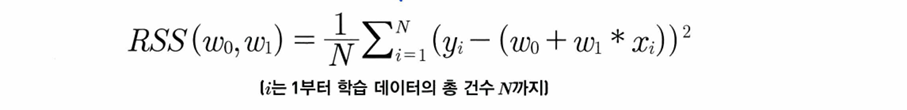


---
### **03. 비용 최소화하기 - 경사 하강법(Gradient Descent)**

- 경사 하강법: 점진적 하강, 점진적으로 반복적인 계산을 통해 W 파라미터 값 업데이트, 오류 값이 최소가 되는 W 파라미터를 구하는 방식
   - 예측값과 실제 값의 차이가 작아지는 방향성을 가지고 W 파라미터를 지속적으로 보정.
   - 오류값이 더 작아지지 않으면 최소 비용으로 판단, 그때의 W값을 최적 파라미터로 반환
   - 기울기의 크기가 작아지는 방향, 기울기의 크기가 최소일때 비용함수가 최소
   
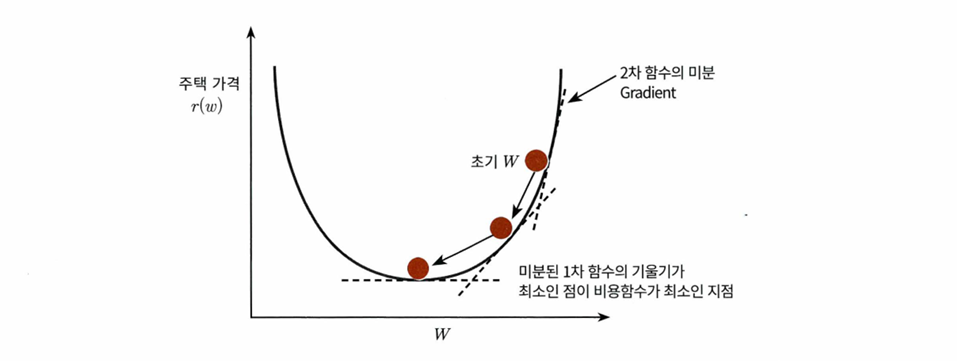

   - w0, w1의 편미분 결괏값이 최소가 되도록, w0,w1을 업데이트.
   - 새로운 W =  이전W - (보정계수)*편미분 결괏값. ==>(보정계수=학습률)

* 프로세스 정리
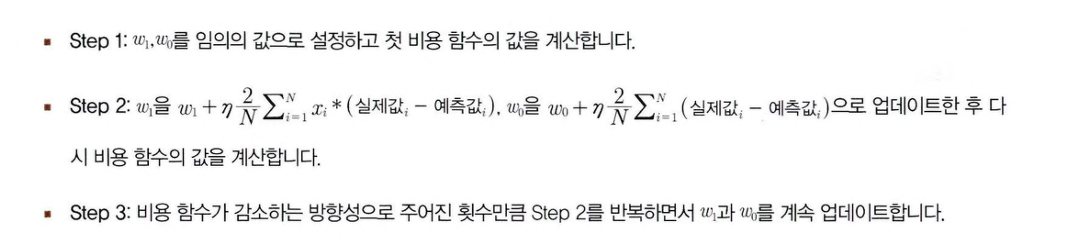

- 모든 학습 데이터에 대해 반복적으로 비용함수 최소화를 위한 값을 업데이트 하므로, 수행시간이 매우 오래걸림
  - 실전에서는 확률적 경사 하강법 이용
  - 전체 데이터 대신 일부 데이터(랜덤 추출)로 w를 업데이트, 빠른 속도 보장 ( gradeint_descent_steps())
  - batch_size만큼 추출, samlpe_X, y만 차이
  - 예측 성능상의 큰 차이가 없음
  - 큰 데이터 처리 시 이용

- 피처가 여러개(M개)인 경우, 회귀계수도 M+1개 도출, 선형대수 이용해 예측값 도출
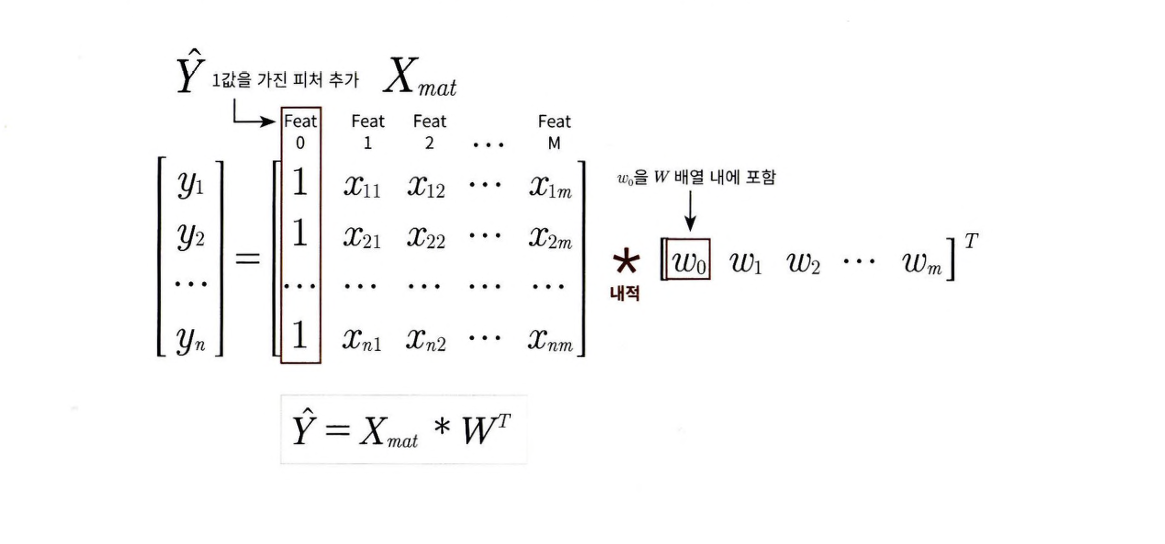


---

### **04. 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측**

(1) LinearRegression 클래스-Ordinary Least Squares

- RSS 최소화하여 OLS 추정방식으로 구현한 클래스.
- fit(X,y)-> W를 coef_속성에 저장
- 다중공산성문제: 입력피처의 독립성에 많은 영향을 받음(상관관계가 높으면 분산이 커져 오류에 민감)
   - 독립적 주요 피처 남기고 제거, 규제
   - PCA로 차원축소

```
class sklearn.linear_model.LinearRegression(fit_inter=True, normalize=False, copy_X=True, n_jobs=1)
```

(2) 회귀 평가 지표

- 오류의 절댓값 평균이나 제곱(루트 평균)을 이용
- MSLE/RMSLE : MSLE/RMSE에 로그적용
- RMSE는 사이킷런 제공이 안되므로 직접 MSE에 제곱근을 씌워 계산해야함.

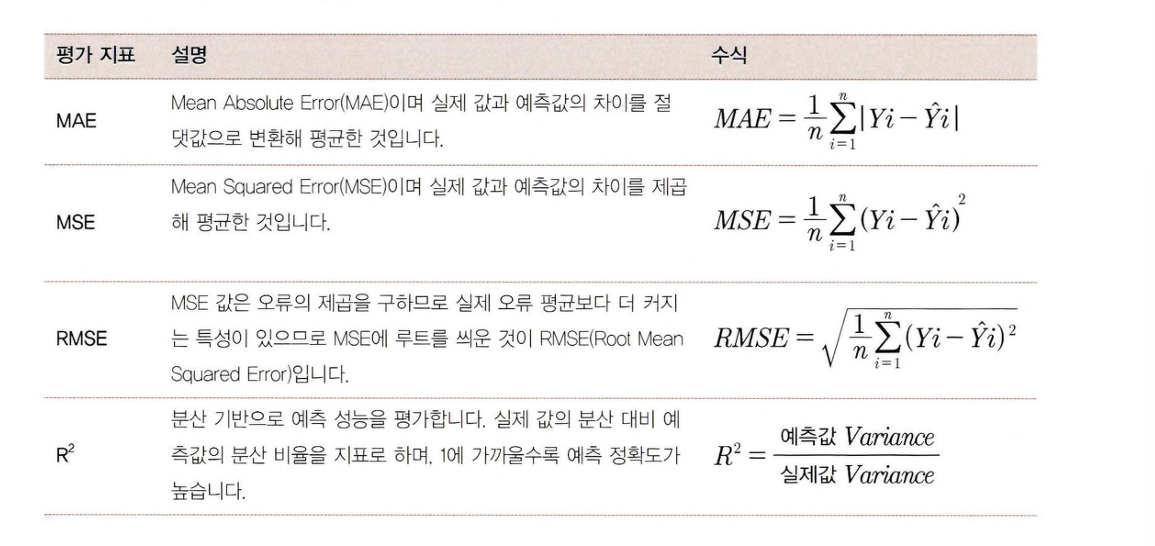

- 주의: cross_val_score, GridSearchCV 같은 scoring함수에 scoring="neg_mean_absolute_error"하면 -1*metrics.mean_absolute_error()가 반환됨(음수): 작은 오류값이 더 큰 숫자로 인식되어 좋은 평가 결과로 반영되도록 함



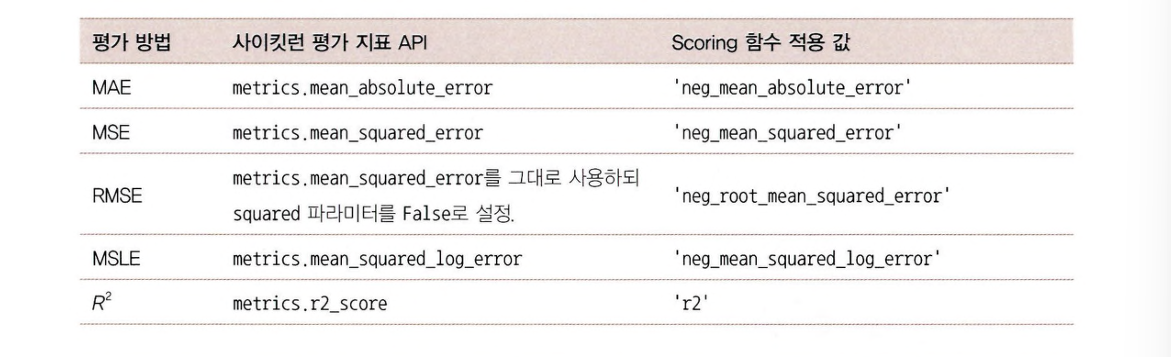

(3) LinearRegrssion을 이용해 보스턴 주택 가격 회귀 구현

- 사이킷런에 내장된 데이터 load_boston()
- 각 칼럼이 회귀 결과에 미치는 영향 시각화(칼럼 별 값 증가할 수록 PRICE 값의 변화 산점도, 회귀직선 확인)
- 양 방향/음 방향의 선형성 확인
- 선형 회쉬 OLS로 학습, 예측, 평가
- .intercept_: 절편값 , .coef_:회귀 계수
- 교차검증으로 mse, rmse측정
- scoring="neg_mean_squared_error"주의

---

### **05. 다항 회귀와 과(대)적합/과소적합**

(1) 다항 회귀 이해

- 선형 회귀, 독립변수의 다항식 표현
- 회귀의 선형/비선형은 회귀 계수의 선형여부에 따름. 독립변수의 선형여부와 무관함
- PolynomialFeatures(degree=n) 이용해 다항식 계수 피처로 전환, 변환된 피처에 선형 회귀를 적용해 다항 회귀를 구현함

(2) 다항 회귀를 이용한 과소적합 및 과적합 이해

- 피처의 복잡한 다항 관계를 모델링 할 수 있음.
- 차수가 높아질수록 과적합의 문제 발생
- 좋은 예측 모델은 과소적합 모델도, 과적합 모델도 아닌 복잡하지 않은 균형 잡힌 모델임

(3) 편향-분산 트레이드오프

- 매우 단순화된 모델은 고평향성을 가짐. 높은 과적합 모델은 고분산성을 가짐
- 평향과 분산은 트레이드 오프를 이룸
   - 높은 편향/낮은 분산: 과소적합
   - 낮은 평향/높은 분산: 과적합

- 오류 Cost가 최대로 낮아지는 모델을 구축해야 함

### **[코드 필사]**

**03. 경사하강법**

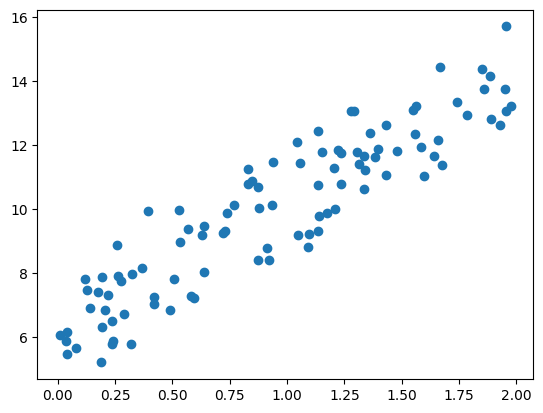

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6을 근사(w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦.
X = 2*np.random.rand(100,1)
y = 6 + 4*X + np.random.randn(100,1)

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X,y)

In [ ]:
# 비용 함수를 정의
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y-y_pred))/N
  return cost

In [ ]:
# 경사하강법 함수
# w1와 w0를 업데이트할 w1_update, w0_update를 반환,
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
  N = len(y)
  # 먼저, w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0값으로 초기화
  w1_update = np.zeros_like(w1)
  w0_update = np.zeros_like(w0)
  # 예측 배열 계산하고 예측과 실제 값의 차이 계산
  y_pred = np.dot(X, w1.T)+w0
  diff = y - y_pred

  # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
  w0_factors = np.ones((N,1))
  # w1과 w0을 업데이트할 w1_update와 w0_updat 계산
  w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
  w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

  return w1_update, w0_update

In [ ]:
# 경사 하강 방식 반복 수행 함수
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함.
def gradient_descent_steps(X,y,iters=10000):
  # w0와 w1을 모두 0으로 초기화.
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))

  # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행
  for ind in range(iters):
    w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0

In [ ]:
# 최종적으로 예측값-실제값(RSS) 계산하는 함수
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y-y_pred))/N
  return cost

w1, w0 = gradient_descent_steps(X,y,iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0],w0[0,0]))
y_pred = w1[0,0]*X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


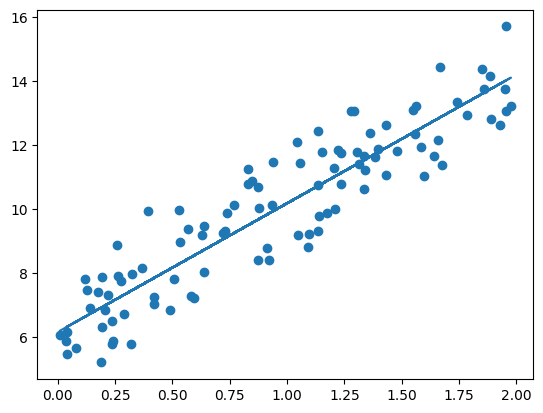

In [ ]:
plt.scatter(X,y)
plt.plot(X, y_pred)

In [ ]:
# 미니 배치 확률적 경사 하강법
def stochastic_gradient_descent_steps(X,y,batch_size=10, iters=1000):
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))
  for ind in range(iters):
    np.random.seed(ind)
    # 전체 X,y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
    stochastic_random_index = np.random.permutation(X.shape[0])
    sample_X = X[stochastic_random_index[0:batch_size]]
    sample_y = y[stochastic_random_index[0:batch_size]]
    # 랜덤하게 batch_size 만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
    w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
    w1 = w1-w1_update
    w0 = w0 - w0_update

  return w1, w0

In [ ]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,0],3), "w0:", round(w0[0,0],3))

y_pred = w1[0,0]*X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1: 4.028 w0: 6.156
Gradient Descent Total Cost:0.9937


**04. 보스턴 주택 가격 예측**

In [ ]:
pip install scikit-learn==1.0.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 52.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.25.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# bostone 데이터 세트 로드
boston = load_boston()

# boston 데이터 세트 DataFrmae 반환
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

# boston 데이터 세트의 target 배열은 주택 가격. 이를 PRICE 칼럼으로 DF에 추가함.
bostonDF['PRICE'] = boston.target
print('Boston 데이터 세트 크기 : ', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기 :  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


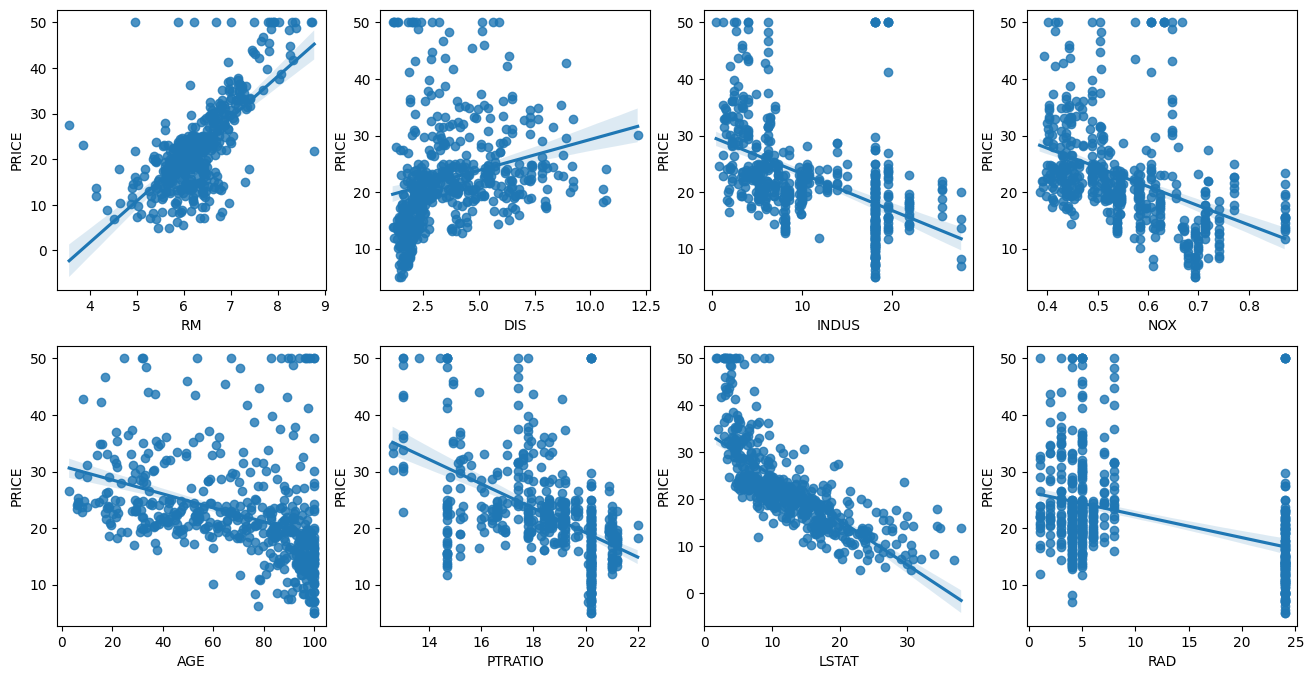

In [ ]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize = (16, 8), ncols = 4, nrows = 2)
lm_features = ['RM', 'DIS', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x = feature, y = 'PRICE', data = bostonDF, ax = axs[row][col])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# 선형 회귀 OLS로 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE:{1:.3f}'.format(mse,rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE:4.159
Variance score: 0.757


In [ ]:
print('절편 값:', np.round(lr.intercept_, 2))
print('회귀 계수 값:', np.round(lr.coef_, 2))

절편 값: 41.0
회귀 계수 값: [-1.10e-01  7.00e-02  3.00e-02  3.05e+00 -1.98e+01  3.35e+00  1.00e-02
 -1.74e+00  3.60e-01 -1.00e-02 -9.20e-01  1.00e-02 -5.70e-01]


In [ ]:
# 회귀 계수를 큰 값으로 정렬하기 위해 Series로 생성. 인덱스 칼럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 2), index=X_data.columns)
coeff.sort_values(ascending=False)

,0
RM,3.35
CHAS,3.05
RAD,0.36
ZN,0.07
INDUS,0.03
AGE,0.01
B,0.01
TAX,-0.01
CRIM,-0.11
LSTAT,-0.57


In [ ]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

# cross_val_score()로 5폴드 세트로 MSE 구한 뒤, 이를 기반으로 다시 RMSE 구함.
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring='neg_mean_squared_error')로 반환된 값은 모두 음수
print(' 5 folds의 개별 Negative MSE scores:', np.round(neg_mse_scores,2))
print(' 5 folds의 개별 RMSE scores:', np.round(rmse_scores,2))
print(' 5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse))

 5 folds의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
 5 folds의 평균 RMSE : 5.829


**05. 다항회귀와 과적합/과소적합 이해**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n', X)

# degree=2인 PolynomialFeatures로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [ ]:
def polynomial_func(X):
  y = 1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
  return y

X = np.arange(0,4).reshape(2,2)
print('일차 단항식 계수 feature:\n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


In [ ]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature:\n', poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n', np.round(model.coef_,2))
print('Polynomial 회귀 Shape:', model.coef_.shape)

3차 다항식 계수 feature:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape: (10,)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
  y = 1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
  return y

# Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])

X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X,y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_,2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환.
def true_fun(x):
  return np.cos(1.5*np.pi*x)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터입니다.
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값입니다.
y = true_fun(X) + np.random.randn(n_samples)*0.1


Degree 1 회귀 계수는 [-1.61]입니다.
Degree 1 MSE는 0.4077289625098685 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26]입니다.
Degree 4 MSE는 0.04320874987232064 입니다.

Degree 15 회귀 계수는 [-2.98293000e+03  1.03899390e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08]입니다.
Degree 15 MSE는 181238256.56423894 입니다.


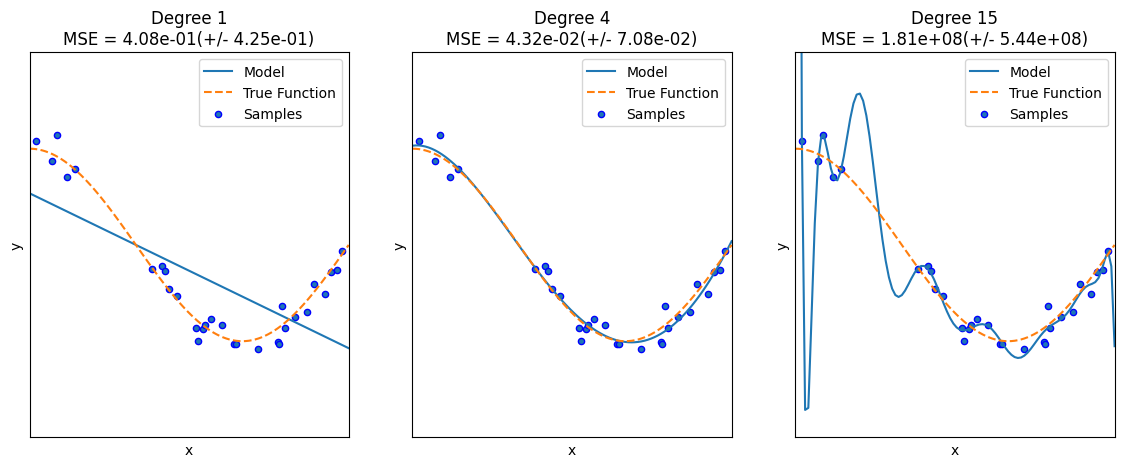

In [ ]:
plt.figure(figsize=(14,5))
degrees=[1,4,15]

# 다항 회귀의 차수(degree)를 1,4,15로 각각 변화시키면서 비교합니다.
for i in range(len(degrees)):
  ax = plt.subplot(1,len(degrees),i+1)
  plt.setp(ax, xticks=(), yticks=())

  # 개별 degree별로 Polynomial 변환합니다.
  polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
  linear_regression = LinearRegression()
  pipeline = Pipeline([('polynomial_features', polynomial_features),
                       ('linear_regression', linear_regression)])
  pipeline.fit(X.reshape(-1,1), y)

  # 교차 검증으로 다항 회귀를 평가합니다.
  scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring='neg_mean_squared_error', cv=10)
  # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
  coefficients = pipeline.named_steps['linear_regression'].coef_
  print('\nDegree {0} 회귀 계수는 {1}입니다.'.format(degrees[i], np.round(coefficients,2)))
  print('Degree {0} MSE는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))

  # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
  # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
  X_test = np.linspace(0,1,100)
  # 예측값 곡선
  plt.plot(X_test, pipeline.predict(X_test[:,np.newaxis]), label='Model')
  # 실제값 곡선
  plt.plot(X_test, true_fun(X_test), '--', label='True Function')
  plt.scatter(X, y, edgecolor='b', s=20, label='Samples')

  plt.xlabel('x')
  plt.ylabel('y')
  plt.xlim((0,1))
  plt.ylim((-2,2))
  plt.legend(loc='best')
  plt.title('Degree {}\nMSE = {:.2e}(+/- {:.2e})'.format(degrees[i], -1*np.mean(scores), np.std(scores)))